In [145]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [146]:
dataset = pd.read_csv("D:/SEMESTER-5/Ekonemetrika Terapan/Project/Dataset/UCI_Credit_Card.csv/UCI_Credit_Card.csv")
dataset.head(5)
list_col =pd.DataFrame(dataset)
print(list(list_col.columns))

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month']


In [147]:
dataset.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [148]:
print("Default Credit Card Clients data -  rows:",dataset.shape[0]," columns:", dataset.shape[1])

Default Credit Card Clients data -  rows: 30000  columns: 25


In [149]:
dataset.drop(columns=["ID"], axis=1, inplace=True)

In [150]:
dataset["default.payment.next.month"].value_counts()

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64

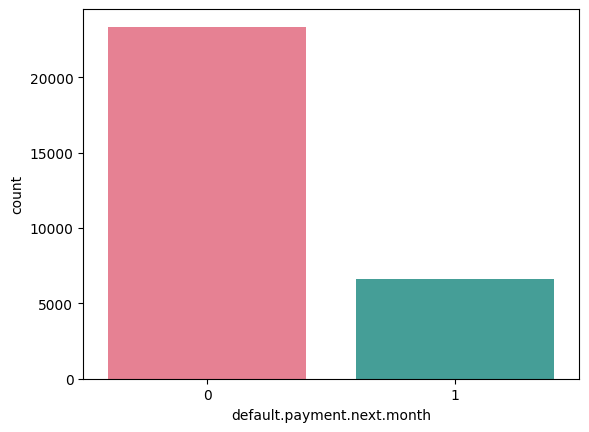

In [151]:
sns.countplot(x="default.payment.next.month", data = dataset, palette='husl')
plt.show()
# plt.savefig("Count Plot")

In [152]:
count_no_default = len(dataset[dataset["default.payment.next.month"]==0])
count_default = len(dataset[dataset["default.payment.next.month"]==1])
percentage_no = count_no_default/(count_no_default+count_default)
percentage_yes = count_default/(count_default+count_no_default)

print("Percentage of customers who did not default: ", round(percentage_no*100,2))
print("Percentage of customers who defaulted: ", round(percentage_yes*100,2))

Percentage of customers who did not default:  77.88
Percentage of customers who defaulted:  22.12


In [153]:
dataset.groupby("default.payment.next.month").mean()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default.payment.next.month,,,,,,,,,,,,,,,,,,,,,
0,178099.726074,1.614150,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,-0.389488,...,47533.365605,43611.165254,40530.445343,39042.268704,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769
1,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,0.167872,...,45181.598855,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068


Text(0, 0.5, 'Frequency')

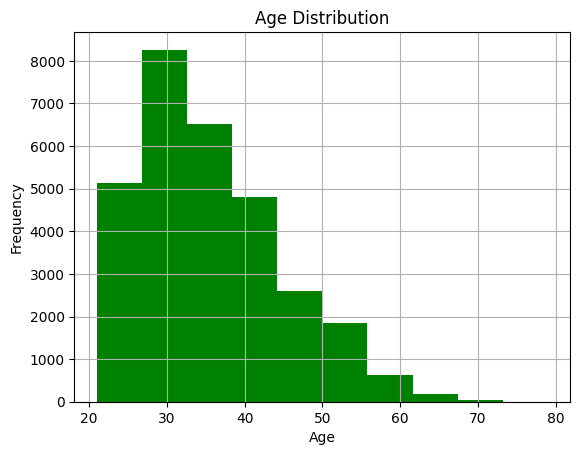

In [154]:
%matplotlib inline
dataset["AGE"].hist(color="green")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
# plt.savefig("Histogram Age")

Text(0, 0.5, 'Frequency')

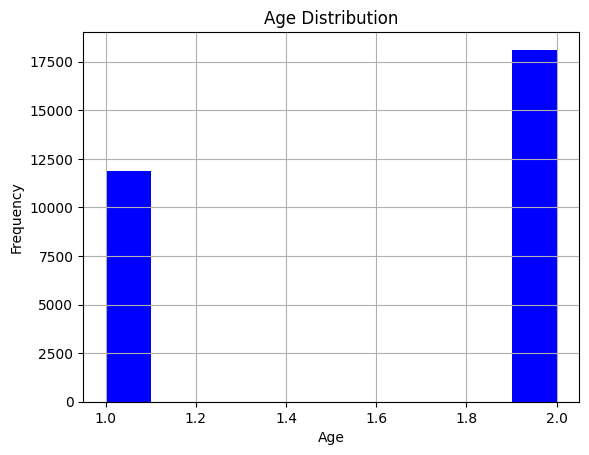

In [155]:
dataset["SEX"].hist(color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

In [156]:

#Over-sampling_using SMOTE
X = dataset.loc[:, dataset.columns != 'default.payment.next.month']
y = dataset.loc[:, dataset.columns == 'default.payment.next.month']
from imblearn.over_sampling import SMOTE
os = SMOTE (random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y) 
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
# we can Check the numbers of our data
print("length of oversampled data is ",len (os_data_X))
print("Number of no default in oversampled data", len(os_data_y[os_data_y['default.payment.next.month']==0]))
print("Number of default",len(os_data_y[os_data_y['default.payment.next.month']==1]))
print("Proportion of no default data in oversampled data is ",len (os_data_y[os_data_y['default.payment.next.month']==0])/len(os_data_X))
print("Proportion of default data in oversampled data is ",len(os_data_y[os_data_y['default.payment.next.month']==1])/len(os_data_X))

length of oversampled data is  31308
Number of no default in oversampled data 15654
Number of default 15654
Proportion of no default data in oversampled data is  0.5
Proportion of default data in oversampled data is  0.5


In [157]:

df_vars= dataset.columns.values.tolist() 
y=['default.payment.next.month']
X=[i for i in df_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression 
logreg=LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=14)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

c:\Users\Ardiansyah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Ardiansyah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

[False  True  True  True  True  True  True  True  True  True  True False
 False False False False False  True  True False  True  True False]
[ 6  1  1  1  1  1  1  1  1  1  1  9  2  3 10  7  5  1  1  4  1  1  8]


c:\Users\Ardiansyah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [158]:
#Probit Modeling
import statsmodels.api as smf

cols=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

X = os_data_X[cols]
y = os_data_y['default.payment.next.month']

probit_model = smf.Probit(y,X)
result = probit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.593365
         Iterations 6
                              Results: Probit
Model:              Probit                     Method:           MLE       
Dependent Variable: default.payment.next.month Pseudo R-squared: 0.144     
Date:               2024-09-25 19:39           AIC:              37180.1293
No. Observations:   31308                      BIC:              37288.7005
Df Model:           12                         Log-Likelihood:   -18577.   
Df Residuals:       31295                      LL-Null:          -21701.   
Converged:          1.0000                     LLR p-value:      0.0000    
No. Iterations:     6.0000                     Scale:            1.0000    
------------------------------------------------------------------------------
                Coef.     Std.Err.       z        P>|z|      [0.025     0.975]
------------------------------------------------------------------------------
LIMIT_B

In [159]:
probit_model=smf.Probit(y,X)
result=probit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.593365
         Iterations 6
                              Probit Regression Results                               
Dep. Variable:     default.payment.next.month   No. Observations:                31308
Model:                                 Probit   Df Residuals:                    31295
Method:                                   MLE   Df Model:                           12
Date:                        Wed, 25 Sep 2024   Pseudo R-squ.:                  0.1440
Time:                                19:39:55   Log-Likelihood:                -18577.
converged:                               True   LL-Null:                       -21701.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
LIMIT_BAL  -5.029e-07   7.51e-08     -6.696 

In [160]:
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
Probit=smf.Probit(y_train,X_train)
Probit.fit()
print(Probit.fit().summary())

Optimization terminated successfully.
         Current function value: 0.595085
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595085
         Iterations 5
                              Probit Regression Results                               
Dep. Variable:     default.payment.next.month   No. Observations:                25046
Model:                                 Probit   Df Residuals:                    25033
Method:                                   MLE   Df Model:                           12
Date:                        Wed, 25 Sep 2024   Pseudo R-squ.:                  0.1415
Time:                                19:39:55   Log-Likelihood:                -14905.
converged:                               True   LL-Null:                       -17361.
Covariance Type:                    nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------

In [161]:
params = pd.DataFrame(Probit.fit().params,columns=['coef'],)
params

Optimization terminated successfully.
         Current function value: 0.595085
         Iterations 5


,coef
LIMIT_BAL,-4.608914e-07
SEX,-1.543652e-01
EDUCATION,-1.850333e-01
MARRIAGE,-1.478442e-01
AGE,2.438845e-02
PAY_0,3.530865e-01
PAY_2,1.214341e-01
BILL_AMT1,-8.534418e-07
PAY_AMT1,-4.772493e-06
PAY_AMT2,-6.905488e-06


In [162]:
# result1['y_pred'] = result1["LIMIT_BAL"] * params['coef'][0] + result1['SEX'] * params['coef'][1] + result1["EDUCATION"] * params['coef'][2] + result1["MARRIAGE"] * params['coef'][3] + result1["AGE"] * params['coef'][4] + result1["PAY_0"] * params['coef'][5] + result1["PAY_2"] * params['coef'][6] + result1["PAY_3"] * params['coef'][7] + result1["PAY_4"] * params['coef'][8] + result1["PAY_5"] * params['coef'][9] + result1["PAY_6"] * params['coef'][10] + result1["BILL_AMT1"] * params['coef'][11] + result1["BILL_AMT2"] * params['coef'][12] + result1["BILL_AMT3"] * params['coef'][13] + result1["BILL_AMT4"] * params['coef'][14] + result1["BILL_AMT5"] * params['coef'][15] + result1["BILL_AMT6"] * params['coef'][16] +result1["PAY_AMT1"] * params['coef'][17] + result1["PAY_AMT2"] * params['coef'][18] + result1["PAY_AMT3"] * params['coef'][19] + result1["PAY_AMT4"] * params['coef'][20] + result1["PAY_AMT5"] * params['coef'][21] + result1["PAY_AMT6"] * params['coef'][22]
result1 = X_test

# Menghitung prediksi y_pred berdasarkan koefisien yang baru
result1['y_pred'] = (result1["LIMIT_BAL"] * -4.608914e-07 +
                     result1["SEX"] * -1.543652e-01 +
                     result1["EDUCATION"] * -1.850333e-01 +
                     result1["MARRIAGE"] * -1.478442e-01 +
                     result1["AGE"] * 2.438845e-02 +
                     result1["PAY_0"] * 3.530865e-01 +
                     result1["PAY_2"] * 1.214341e-01 +
                     result1["BILL_AMT1"] * -8.534418e-07 +
                     result1["PAY_AMT1"] * -4.772493e-06 +
                     result1["PAY_AMT2"] * -6.905488e-06 +
                     result1["PAY_AMT4"] * -3.472308e-06 +
                     result1["PAY_AMT5"] * -2.259770e-06 +
                     result1["PAY_AMT6"] * -1.582674e-06)

# Menampilkan hasil
result1


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT4,PAY_AMT5,PAY_AMT6,y_pred
16197,60000.000000,1,2,2,26,0,0,58072.000000,2282.000000,2324.000000,2000.000000,3000.0,1120.000000,-0.305671
23928,320000.000000,1,1,1,37,-1,-1,27192.314707,6187.899481,4927.570090,0.000000,0.0,16511.732189,-0.319775
20229,160000.000000,2,2,1,25,0,0,51963.293789,1709.776912,1814.948073,1608.861943,2000.0,1434.183194,-0.368089
23133,154313.037727,1,4,2,30,1,0,140418.000944,4759.630788,2129.391132,0.000000,0.0,0.000000,-0.333827
16384,230000.000000,2,1,2,33,-2,-2,5869.000000,11556.000000,156.000000,1546.000000,7915.0,0.000000,-1.124171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13997,220000.000000,2,1,1,47,-1,-1,3148.000000,4206.000000,30775.000000,3359.000000,619.0,6641.000000,-0.330116
3821,180000.000000,2,2,3,43,0,0,81147.000000,101522.000000,10264.000000,9600.000000,20000.0,5000.000000,-0.867675
14888,80000.000000,1,2,1,34,1,2,64575.000000,3000.000000,0.000000,2500.000000,9000.0,0.000000,0.617568
2706,280000.000000,1,1,1,44,1,-2,-136.000000,360.000000,360.000000,317.000000,6252.0,8.000000,0.547688


In [163]:
result1['y_pred_Probit'] = 1 / (1 + np.exp(-result1['y_pred']))
result1

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,BILL_AMT1,PAY_AMT1,PAY_AMT2,PAY_AMT4,PAY_AMT5,PAY_AMT6,y_pred,y_pred_Probit
16197,60000.000000,1,2,2,26,0,0,58072.000000,2282.000000,2324.000000,2000.000000,3000.0,1120.000000,-0.305671,0.424172
23928,320000.000000,1,1,1,37,-1,-1,27192.314707,6187.899481,4927.570090,0.000000,0.0,16511.732189,-0.319775,0.420731
20229,160000.000000,2,2,1,25,0,0,51963.293789,1709.776912,1814.948073,1608.861943,2000.0,1434.183194,-0.368089,0.409003
23133,154313.037727,1,4,2,30,1,0,140418.000944,4759.630788,2129.391132,0.000000,0.0,0.000000,-0.333827,0.417310
16384,230000.000000,2,1,2,33,-2,-2,5869.000000,11556.000000,156.000000,1546.000000,7915.0,0.000000,-1.124171,0.245238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13997,220000.000000,2,1,1,47,-1,-1,3148.000000,4206.000000,30775.000000,3359.000000,619.0,6641.000000,-0.330116,0.418212
3821,180000.000000,2,2,3,43,0,0,81147.000000,101522.000000,10264.000000,9600.000000,20000.0,5000.000000,-0.867675,0.295738
14888,80000.000000,1,2,1,34,1,2,64575.000000,3000.000000,0.000000,2500.000000,9000.0,0.000000,0.617568,0.649665
2706,280000.000000,1,1,1,44,1,-2,-136.000000,360.000000,360.000000,317.000000,6252.0,8.000000,0.547688,0.633599


In [164]:
d = {'y_pred_proba': result1['y_pred_Probit']}
df23 = pd.DataFrame(data=d)
df23 = df23.reset_index()
df23.drop(['index'], axis=1, inplace=True)

df23['y_pred'] = 0.000
for i in range(0,len(df23['y_pred_proba'])):
    if df23['y_pred_proba'][i] > 0.500:
        df23['y_pred'][i] = 1.000
    else: 
        df23['y_pred'][i] = 0.000
        
y_pred = np.array(df23['y_pred'])
y_pred = y_pred.astype('int64')
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [165]:
from sklearn.metrics import accuracy_score

print('Accuracy of Logit Model on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of Logit Model on test set: 0.69


In [166]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2353  778]
 [1170 1961]]


In [167]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71      3131
           1       0.72      0.63      0.67      3131

    accuracy                           0.69      6262
   macro avg       0.69      0.69      0.69      6262
weighted avg       0.69      0.69      0.69      6262



In [168]:
y_pred_proba = np.array(df23['y_pred_proba'])
y_pred_proba 

array([0.42417181, 0.42073067, 0.40900285, ..., 0.64966511, 0.6335991 ,
       0.69807979])

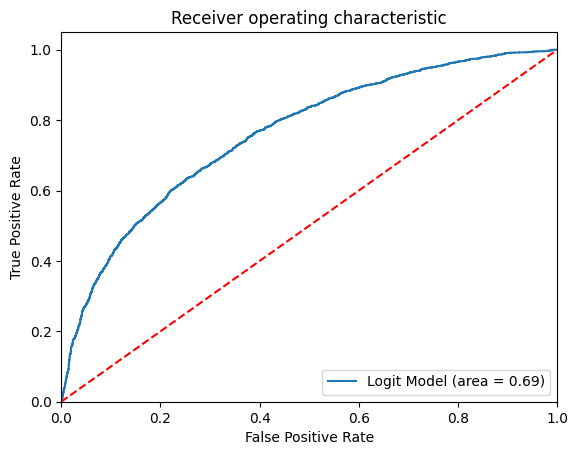

In [169]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label='Logit Model (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Logit_ROC')
plt.show()